In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [2]:
# Download Apple stock data from Jan 1, 2020 to Dec 31, 2023
df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')


C:\Users\SAHITHYA\AppData\Local\Temp\ipykernel_656\2887892449.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [3]:
# Show first few rows
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop any rows with missing data
df = df.dropna()

# Confirm cleaning
df.info()


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [5]:
# Daily returns
df['Daily Return'] = df['Close'].pct_change()

# 20-day Moving Average
df['20-Day MA'] = df['Close'].rolling(window=20).mean()

# 20-day Volatility (standard deviation)
df['20-Day Volatility'] = df['Close'].rolling(window=20).std()


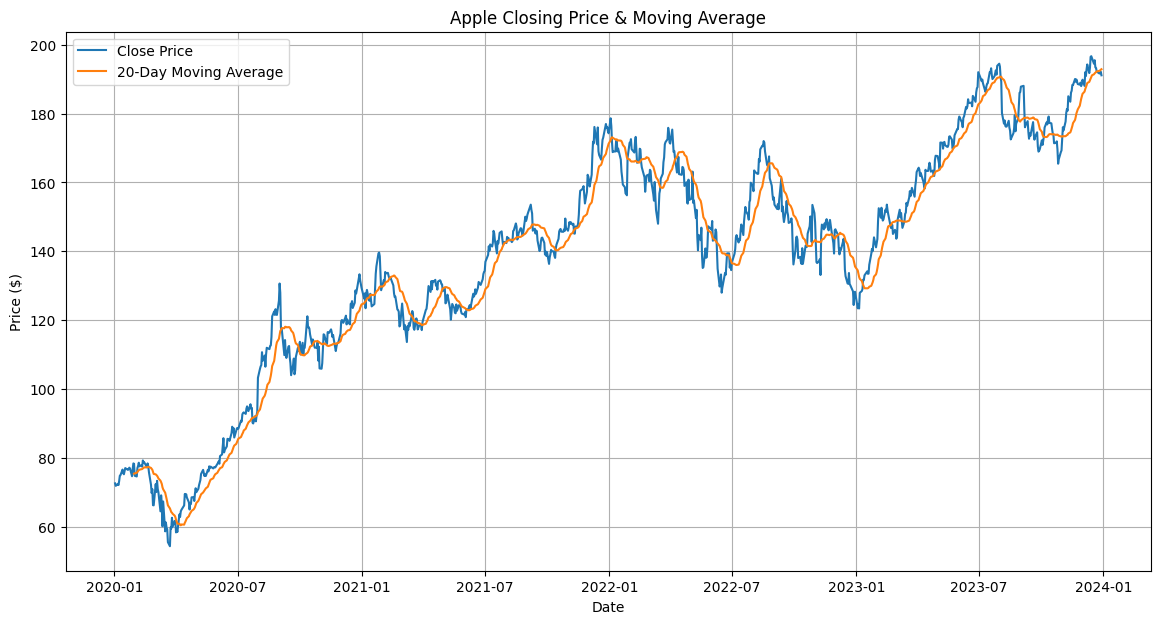

In [6]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['20-Day MA'], label='20-Day Moving Average')
plt.title('Apple Closing Price & Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


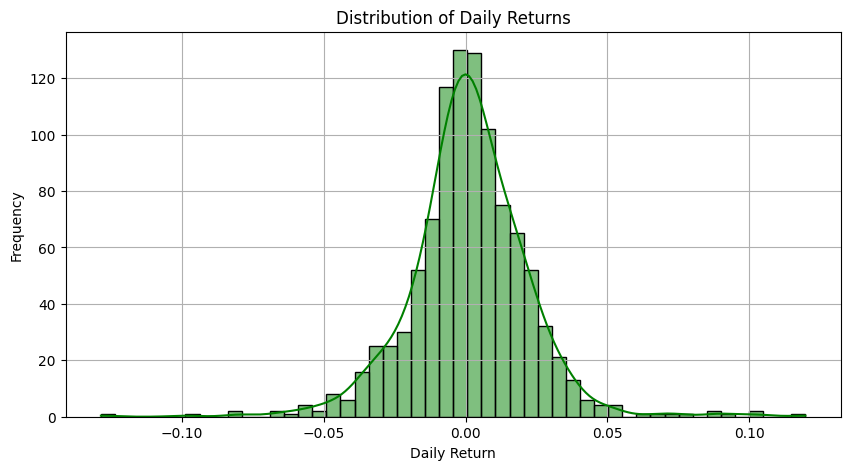

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


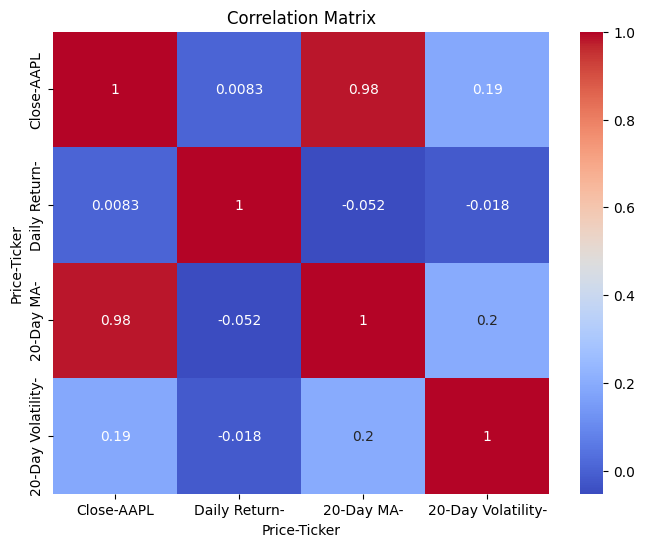

In [8]:
plt.figure(figsize=(8,6))
corr = df[['Close', 'Daily Return', '20-Day MA', '20-Day Volatility']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
